In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                 #importing libraries.
import matplotlib.pyplot as plt

In [2]:
glass = pd.read_csv('glass.csv')   

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()   #checking null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<AxesSubplot:>

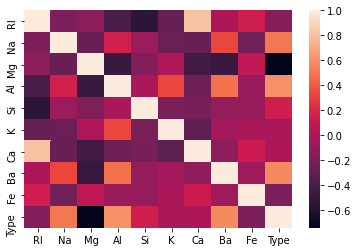

In [5]:
sns.heatmap(glass.corr()) #we can see that k and ca doesn't affect much for type so we can drop it.

In [6]:
glass =  glass.drop(columns=['K','Ca'])

In [7]:
x = glass.iloc[:,0:7]

In [8]:
x

,RI,Na,Mg,Al,Si,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0
...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,1.57,0.0


In [9]:
y=glass.iloc[:,7]

In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler   #transforming data

In [14]:
standardscaler = StandardScaler()

In [15]:
x = standardscaler.fit_transform(x)

In [16]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -1.12708201,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ...,  0.10231907,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ...,  0.43878673,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  0.99525248,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ...,  1.2411327 ,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ...,  0.9176061 ,
         3.01367739, -0.5864509 ]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier  #initialised KNN classifier.

In [18]:
from sklearn.model_selection import train_test_split  #done model validation.

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [73]:
model = KNeighborsClassifier(n_neighbors=3)  #gave parameter value=3 by searching it through grid search cv.

In [74]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred = model.predict(x_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_pred,y_test))   #accuracy is 79%

              precision    recall  f1-score   support

           1       0.86      0.71      0.77        17
           2       0.65      0.92      0.76        12
           3       0.00      0.00      0.00         1
           5       1.00      0.75      0.86         4
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         7

    accuracy                           0.79        43
   macro avg       0.67      0.65      0.65        43
weighted avg       0.80      0.79      0.78        43



/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.model_selection import GridSearchCV  #used grid search cv for best parameter.

In [84]:
n_neighbors = np.array(range(1,10))
param_grid = dict(n_neighbors=n_neighbors)

In [85]:
grid = GridSearchCV(estimator=model,param_grid =param_grid)

In [86]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [89]:
print(grid.best_params_)

{'n_neighbors': 3}


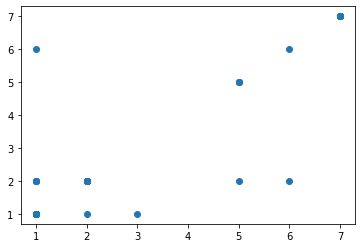

In [88]:
plt.scatter(y_pred,y_test)  #plotted a graph to find difference between original and error value.